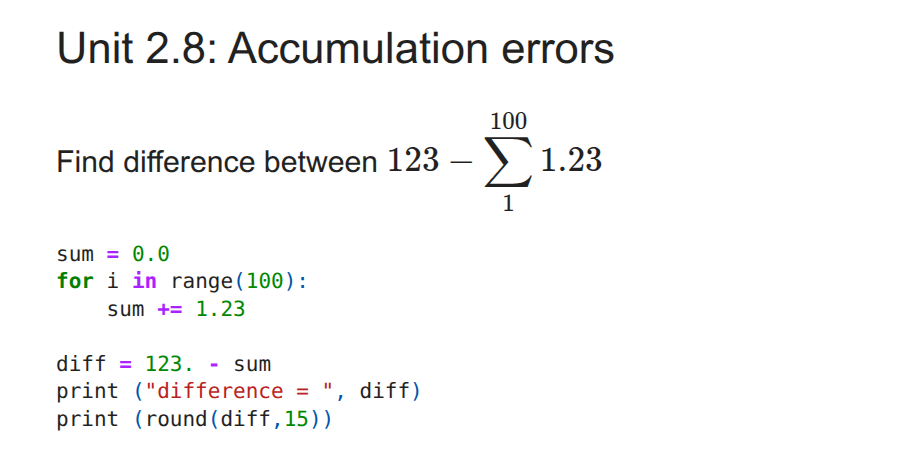

In [64]:
sum = 0.
for i in range(100):
    
    #sum = sum + 1.23
    sum += 1.23
    #print ("iter= %d, sum = %f"%(i,sum))
    
print ("iter= %d, sum = %f"%(i,sum))    
difference = sum - 123
print (difference)

iter= 99, sum = 123.000000
1.1368683772161603e-13


In [65]:
sum = 0.
for i in range(100):
    sum += 1.25
    #print ("iter= %d, sum = %f"%(i,sum))
    
print ("iter= %d, sum = %f"%(i,sum))    
difference = sum - 125
print (difference)

iter= 99, sum = 125.000000
0.0
